# SD TSIA 211 Computer Lab 2

## Computer Lab 2: Digit recognition

### Author: RIOS GALLEGO Juan

## 3 Dependences

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from random import *
import matplotlib.pyplot as plt

## 2 Dataset

5


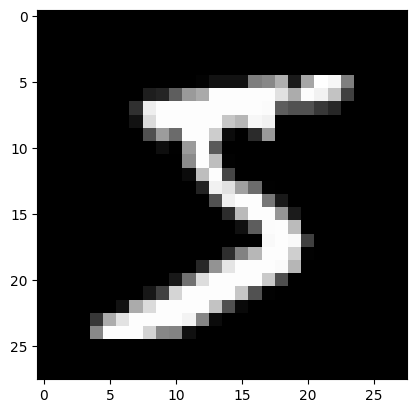

In [2]:
train_data, test_data = tf.keras.datasets.mnist.load_data(path="mnist.npz")
x_train = train_data[0].reshape(-1,784).astype(float) / 255
y_train = train_data[1]
print(y_train[0])
plt.imshow(train_data[0][0], cmap='gray')

## 4 Model

In [3]:
# source: https://keras.io/guides/training_with_built_in_methods/

inputs = keras.Input(shape=(784,), name="digits")
x = layers.Dense(32, activation="relu", name="dense_1")(inputs)
x = layers.Dense(32, activation="relu", name="dense_2")(x)
outputs = layers.Dense(10, activation=None, name="predictions")(x)
model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.summary()


Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 digits (InputLayer)         [(None, 784)]             0         
                                                                 
 dense_1 (Dense)             (None, 32)                25120     
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 predictions (Dense)         (None, 10)                330       
                                                                 
Total params: 26506 (103.54 KB)
Trainable params: 26506 (103.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [4]:
# untrained model
logits = model(x_train)
np.argmax(logits, 1)[0:100]

array([4, 9, 9, 9, 9, 4, 9, 9, 9, 9, 9, 5, 4, 9, 9, 9, 9, 4, 4, 4, 9, 9,
       5, 9, 9, 9, 9, 9, 9, 9, 9, 4, 4, 4, 9, 9, 9, 4, 1, 9, 9, 4, 5, 4,
       5, 9, 9, 9, 4, 4, 9, 9, 9, 6, 9, 9, 9, 9, 9, 9, 4, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 4, 9, 9, 9, 9, 9, 4, 9, 9, 9, 9, 4, 6, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 5, 9, 4, 6], dtype=int64)

In [5]:
# what we would like to get
y_train[0:100]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9,
       3, 9, 8, 5, 9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0, 4, 5,
       6, 1, 0, 0, 1, 7, 1, 6, 3, 0, 2, 1, 1, 7, 9, 0, 2, 6, 7, 8, 3, 9,
       0, 4, 6, 7, 4, 6, 8, 0, 7, 8, 3, 1], dtype=uint8)

## 5 Stochastic gradient descent


In [6]:
# update weights function
def update_weights(model, update, gama):
    new_weights = model.trainable_weights.copy()
    for i in range(len(new_weights)):
        new_weights[i] = new_weights[i] - gama * update[i]
    model.set_weights(new_weights)

In [7]:
# Stochastic gradient algorithm
def SGD(model, x_train, y_train, loss, K):
    gama = 1/np.sqrt(K) # learning rate
    loss_values = []
    for i in range(K):
        if i % 1000 == 0:
            logits = model(x_train)
            loss_value = loss(y_train, logits)
            loss_values.append(loss_value)
        index = randint(0, K - 1)
        xt_batch = x_train[index].reshape(-1,784)
        yt_batch = y_train[index]
        with tf.GradientTape() as tape:
            logits = model(xt_batch)
            loss_value = loss(yt_batch, logits)
            
        grads = tape.gradient(loss_value, model.trainable_weights)
        update_weights(model, grads, gama)
    return loss_values

Loss value: [<tf.Tensor: shape=(), dtype=float32, numpy=2.3512588>, <tf.Tensor: shape=(), dtype=float32, numpy=0.96804553>, <tf.Tensor: shape=(), dtype=float32, numpy=0.63746715>, <tf.Tensor: shape=(), dtype=float32, numpy=0.5425624>, <tf.Tensor: shape=(), dtype=float32, numpy=0.4477989>, <tf.Tensor: shape=(), dtype=float32, numpy=0.42734456>, <tf.Tensor: shape=(), dtype=float32, numpy=0.4120715>, <tf.Tensor: shape=(), dtype=float32, numpy=0.3858473>, <tf.Tensor: shape=(), dtype=float32, numpy=0.36675078>, <tf.Tensor: shape=(), dtype=float32, numpy=0.36001614>, <tf.Tensor: shape=(), dtype=float32, numpy=0.37634745>, <tf.Tensor: shape=(), dtype=float32, numpy=0.3584964>, <tf.Tensor: shape=(), dtype=float32, numpy=0.30646384>, <tf.Tensor: shape=(), dtype=float32, numpy=0.31341928>, <tf.Tensor: shape=(), dtype=float32, numpy=0.33843404>, <tf.Tensor: shape=(), dtype=float32, numpy=0.31454945>, <tf.Tensor: shape=(), dtype=float32, numpy=0.27185062>, <tf.Tensor: shape=(), dtype=float32, nump

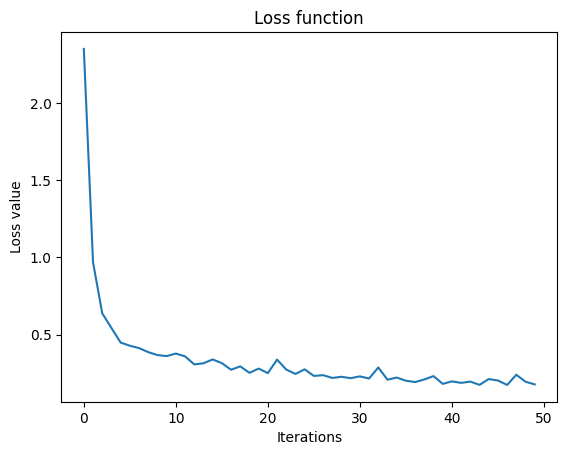

In [8]:
K = 50000
loss_value = SGD(model, x_train, y_train, loss, K)
print("Loss value:", loss_value)

#Plot the loss function
plt.xlabel("Iterations")
plt.ylabel("Loss value")
plt.title("Loss function")
plt.plot(loss_value)
plt.show()


## 6 Empirical risk minimization


In [18]:
# Empirical risk minimization
def ERM(model, x_train, y_train, loss, K, batch, epochs):
    losses = []
    gama = 1/np.sqrt(K) # learning rate
    for j in range(epochs):
        for i in range(K//batch):
            xt_batch = x_train[i*batch:(i+1)*batch].reshape(-1,784)
            yt_batch = y_train[i*batch:(i+1)*batch]

            with tf.GradientTape() as tape:
                logits = model(xt_batch)
                loss_value = loss(yt_batch, logits)
                
            grads = tape.gradient(loss_value, model.trainable_weights)
            update_weights(model, grads, gama)
        
            index = np.random.randint(0, 5999, 1000)

            logits = model(x_train[index])
            loss_value = loss(y_train[index], logits).numpy()
            losses.append(loss_value)

    return losses

Loss value: [0.053777378, 0.061638545, 0.05763042, 0.07074515, 0.06573233, 0.058463477, 0.07172565, 0.08442389, 0.061201513, 0.08369516, 0.04149602, 0.05651465, 0.048757896, 0.05587505, 0.06279348, 0.07123631, 0.06585233, 0.06273618, 0.05320581, 0.053843196, 0.113877885, 0.068902224, 0.063136965, 0.055484496, 0.0554115, 0.072720416, 0.073876545, 0.048320685, 0.058607694, 0.057651397, 0.05270958, 0.07872386, 0.06659975, 0.07876817, 0.044944756, 0.07040333, 0.049177833, 0.04917639, 0.09464124, 0.04775244, 0.07171309, 0.054017704, 0.07432178, 0.07150335, 0.0775315, 0.103526056, 0.044746336, 0.038423765, 0.06884598, 0.05237282, 0.06443887, 0.06663204, 0.04492125, 0.05428074, 0.0770743, 0.06883633, 0.07144902, 0.053405233, 0.073784016, 0.067066394, 0.05682108, 0.06249703, 0.07565293, 0.049547143, 0.062554896, 0.07270236, 0.05838884, 0.06551424, 0.06538976, 0.085509725, 0.058477663, 0.07416545, 0.09631885, 0.05652892, 0.06274922, 0.062660374, 0.06828212, 0.0668115, 0.06803386, 0.07762679, 0.

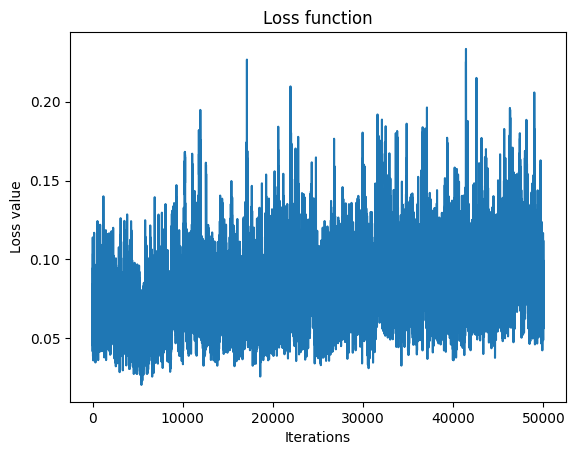

In [19]:
losses = ERM(model, x_train, y_train, loss, K, 1, 1)
print("Loss value:", losses)

#Plot the loss function
plt.xlabel("Iterations")
plt.ylabel("Loss value")
plt.title("Loss function")
plt.plot(losses)
plt.show()


Loss value: [0.06965371, 0.06600977, 0.07892633, 0.0865041, 0.07388805, 0.082135074, 0.10761313, 0.082222365, 0.08719313, 0.10491308, 0.0624136, 0.06958859, 0.113875605, 0.06988882, 0.07715139, 0.08064108, 0.11412091, 0.091573, 0.10632187, 0.06898286, 0.06829147, 0.065024294, 0.08226713, 0.075798355, 0.078448236, 0.0797213, 0.08366661, 0.079649374, 0.06290242, 0.07303926, 0.086997606, 0.09458278, 0.05854142, 0.07319524, 0.057425987, 0.05838494, 0.074065626, 0.066720545, 0.06375433, 0.050624266, 0.08042179, 0.067845285, 0.07531099, 0.06916048, 0.07462358, 0.05287461, 0.06940441, 0.068810925, 0.10014158, 0.08866477, 0.07194986, 0.059826743, 0.052687448, 0.07617638, 0.09139936, 0.06474891, 0.07146681, 0.047516312, 0.0728385, 0.10030685, 0.06471564, 0.047540378, 0.09681856, 0.04954407, 0.061468933, 0.111226164, 0.06744664, 0.075965315, 0.0637069, 0.08130292, 0.06001001, 0.092678376, 0.108866856, 0.064867355, 0.08745097, 0.06569316, 0.06650488, 0.070405185, 0.06399357, 0.09922914, 0.0697897

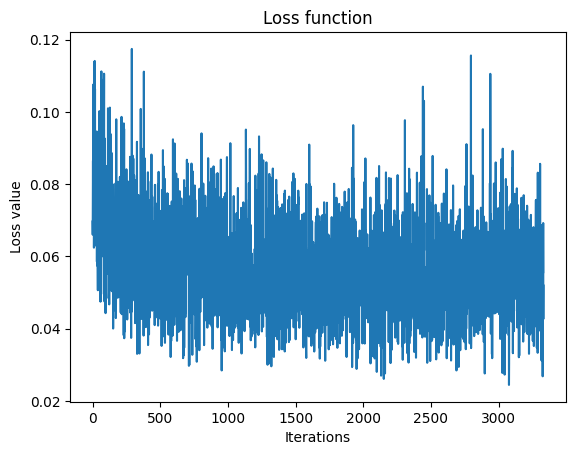

In [20]:
losses = ERM(model, x_train, y_train, loss, K, 15, 1)
print("Loss value:", losses)

#Plot the loss function
plt.xlabel("Iterations")
plt.ylabel("Loss value")
plt.title("Loss function")
plt.plot(losses)
plt.show()


Loss value: [0.057775334, 0.047932915, 0.06617295, 0.060892563, 0.060372792, 0.05955474, 0.039686367, 0.062446956, 0.058446616, 0.04373532, 0.06247331, 0.054134384, 0.06512803, 0.061146736, 0.06262772, 0.06693191, 0.051239505, 0.0444153, 0.061733734, 0.06236878, 0.061563537, 0.05059191, 0.038736463, 0.051644184, 0.04192707, 0.04594516, 0.03674569, 0.056623306, 0.05655109, 0.045697626, 0.0570449, 0.077912055, 0.05755134, 0.038044788, 0.060448762, 0.037578057, 0.04789238, 0.06691143, 0.042509697, 0.051364925, 0.044723764, 0.067789294, 0.047604203, 0.059127785, 0.055081554, 0.052749466, 0.044855874, 0.058097586, 0.044925924, 0.056595307, 0.04918101, 0.07549666, 0.05661165, 0.050438333, 0.063414775, 0.054547075, 0.06786793, 0.04833571, 0.07184847, 0.06527672, 0.045151684, 0.059583366, 0.058161452, 0.045132298, 0.044925284, 0.048911758, 0.04985228, 0.073943175, 0.041434515, 0.066423565, 0.046428256, 0.072787225, 0.043043748, 0.04340019, 0.0468464, 0.040304236, 0.03537898, 0.06447629, 0.0848

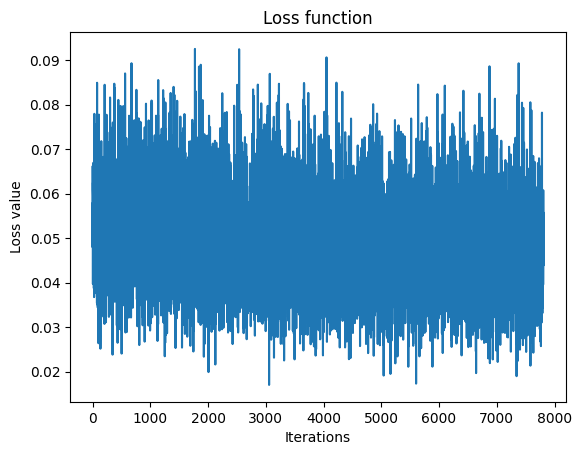

In [21]:
losses = ERM(model, x_train, y_train, loss, K, 64, 10)
print("Loss value:", losses)

#Plot the loss function
plt.xlabel("Iterations")
plt.ylabel("Loss value")
plt.title("Loss function")
plt.plot(losses)
plt.show()


## 7 Evaluation of the model


In [22]:
#Train the model
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01), loss=loss)
model.fit(x_train, y_train, batch_size=64, epochs=10)
model.evaluate(x_train, y_train)

Epoch 1/10

938/938 [==============================] - 3s 3ms/step - loss: 0.0571
Epoch 2/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0558
Epoch 3/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0545
Epoch 4/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0537
Epoch 5/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0528
Epoch 6/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0519
Epoch 7/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0512
Epoch 8/10
938/938 [==============================] - 2s 3ms/step - loss: 0.0506
Epoch 9/10
938/938 [==============================] - 2s 3ms/step - loss: 0.0498
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0478


0.04777505248785019

In [25]:
#Evaluate the model
model.evaluate(x_train, y_train, verbose=2)

test_loss = model.evaluate(x_train, y_train, verbose=2)

1875/1875 - 3s - loss: 0.0478 - 3s/epoch - 1ms/step
1875/1875 - 3s - loss: 0.0478 - 3s/epoch - 1ms/step


Test loss: 0.04777505248785019
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 3 2 4 3 2 7 3 8 6 9 0 5 6
 0 7 6 1 8 7 9 3 9 8 5 9 3 3 0 7 4 9 8 0 9 4 1 4 4 6 0 4 5 6 1 0 0 1 7 1 6
 3 0 2 1 1 7 0 0 2 6 7 8 3 9 0 4 6 7 4 6 8 0 7 8 3 1]
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5 6
 0 7 6 1 8 7 9 3 9 8 5 9 3 3 0 7 4 9 8 0 9 4 1 4 4 6 0 4 5 6 1 0 0 1 7 1 6
 3 0 2 1 1 7 9 0 2 6 7 8 3 9 0 4 6 7 4 6 8 0 7 8 3 1]


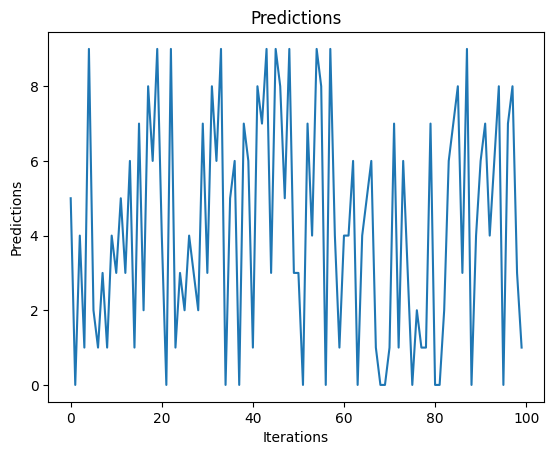

In [26]:
print("Test loss:", test_loss)

#Predictions
predictions = model(x_train)
predictions = tf.nn.softmax(predictions)
predictions = np.argmax(predictions, 1)
print(predictions[0:100])
print(y_train[0:100])

#Plot the predictions
plt.xlabel("Iterations")
plt.ylabel("Predictions")
plt.title("Predictions")
plt.plot(predictions[0:100])
plt.show()
